# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

## [Task 1] Create a Class of Linear Regression from Scratch

<br />

I will create a class of linear regression and incorporate it to the pipeline of regressions on the "sprint2" directory.

### Hypothesis Function

<br />

I implement the following hypothesis function of linear regression.

$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_j x_j + \theta_n x_n \ \ \ (x_0=1)
$$

$x$: feature vector

$\theta$: parameter vector

$n$: the number of features

$x_j$: jth feature vector

$\theta_j$: jth parameter(weight) vector

I will implement the hypothesis function that can apply to any $n$, the number of features.

<br />

In addition, the following equation is the vector format.

$$
h_\theta(x) = \theta^T x
$$

### Objective Function

<br />


I will implement the following objective function of linear regression. This is the MSE, mean square error divided by 2 to use the steepest descent method easily.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$: the number of data input

$h_\theta()$: hypothesis function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct values of ith sample

### Steepest Descent Method

<br />

I will fit datasets by steepest descent method. The following equation is to update the jth parameter.

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\alpha$: learning rate

$i$: index of a sample

$j$: index of a feature

#### Validate the Class

<br />

I am going to validate the class by using the "House Prices: Advanced Regression Techniques" datasets on Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys

In [2]:
# Prepare a dataset for the validation

# Import the dataset
train = pd.read_csv('"House Prices- Advanced Regression Techniques".train.csv')
test = pd.read_csv('"House Prices- Advanced Regression Techniques".test.csv')

# Split the datasets into explanatory and objective variables
X = train.loc[:,["GrLivArea", "YearBuilt"]].values
y = train.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [4]:
# Import a class

# Add a path searching for specific modules
sys.path.append("../scratch/model/")

# Import "ScratchLinearRegression"
from regression_pipeline2 import ScratchLinearRegression

In [5]:
# Initialize the class

slr = ScratchLinearRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)

In [6]:
slr.fit(std_X_train, y_train, std_X_test, y_test)

19425629915.702824
19826347898.141872
19425183068.87978
19825796264.22079
19424736326.12616
19825244753.157013
19424289687.41768
19824693364.922516
19423843152.730057
19824142099.48926
19423396722.039036
19823590956.829227
19422950395.320343
19823039936.914402
19422504172.549717
19822489039.716763
19422058053.70291
19821938265.20831
19421612038.755672
19821387613.361046
19421166127.683765
19820837084.14698
19420720320.462944
19820286677.538128
19420274617.06898
19819736393.506496
19419829017.477657
19819186232.024128
19419383521.66475
19818636193.063057
19418938129.606045
19818086276.595314
19418492841.277332
19817536482.592953
19418047656.65441
19816986811.028027
19417602575.71309
19816437261.872593
19417157598.429165
19815887835.098717
19416712724.77846
19815338530.67847
19416267954.7368
19814789348.58394
19415823288.280003
19814240288.787205
19415378725.3839
19813691351.260353
19414934266.024334
19813142535.97549
19414489910.177143
19812593842.90472
19414045657.818172
19812045272.02

19217487276.273903
19568751151.373386
19217088900.29011
19568256810.836956
19216690617.067265
19567762580.09223
19216292426.583736
19567268459.114197
19215894328.817875
19566774447.877846
19215496323.748062
19566280546.358166
19215098411.35267
19565786754.53015
19214700591.610077
19565293072.368805
19214302864.49867
19564799499.849155
19213905229.996838
19564306036.946198
19213507688.082985
19563812683.63496
19213110238.735493
19563319439.890476
19212712881.93279
19562826305.687775
19212315617.65327
19562333281.001892
19211918445.875355
19561840365.807877
19211521366.577465
19561347560.080776
19211124379.738026
19560854863.795654
19210727485.335464
19560362276.92756
19210330683.348225
19559869799.451572
19209933973.754745
19559377431.34276
19209537356.533463
19558885172.576206
19209140831.66284
19558393023.126987
19208744399.12133
19557900982.970203
19208348058.88739
19557409052.080948
19207951810.939487
19556917230.434322
19207555655.2561
19556425518.005436
19207159591.815693
19555933

19063501438.141167
19377256607.24519
19063138914.25685
19376804747.610855
19062776474.770203
19376352988.0939
19062414119.661533
19375901328.671555
19062051848.911163
19375449769.321033
19061689662.499416
19374998310.019566
19061327560.406612
19374546950.744373
19060965542.6131
19374095691.472706
19060603609.099197
19373644532.18179
19060241759.845253
19373193472.848877
19059879994.831615
19372742513.451225
19059518314.038635
19372291653.96608
19059156717.446667
19371840894.370716
19058795205.03606
19371390234.64239
19058433776.787197
19370939674.758377
19058072432.680428
19370489214.69596
19057711172.69614
19370038854.432415
19057349996.814713
19369588593.945038
19056988905.016514
19369138433.211117
19056627897.28194
19368688372.20795
19056266973.591385
19368238410.91284
19055906133.92524
19367788549.3031
19055545378.26391
19367338787.356052
19055184706.587795
19366889125.049
19054824118.87731
19366439562.359276
19054463615.11287
19365990099.264214
19054103195.27489
19365540735.741142

18927668222.30347
19207578229.300537
18927337318.41366
19207163920.740665
18927006491.546406
19206749703.75747
18926675741.68375
19206335578.330124
18926345068.807735
19205921544.437828
18926014472.9004
19205507602.05977
18925683953.943794
19205093751.175148
18925353511.919975
19204679991.763176
18925023146.811
19204266323.803055
18924692858.59893
19203852747.274
18924362647.26582
19203439262.15523
18924032512.79376
19203025868.425976
18923702455.164803
19202612566.065456
18923372474.36104
19202199355.052906
18923042570.36455
19201786235.36756
18922712743.15742
19201373206.988674
18922382992.721745
19200960269.895493
18922053319.03961
19200547424.067257
18921723722.09312
19200134669.483227
18921394201.86438
19199722006.122673
18921064758.335495
19199309433.964855
18920735391.488583
19198896952.989044
18920406101.305748
19198484563.174522
18920076887.769115
19198072264.500565
18919747750.860813
19197660056.94646
18919418690.562965
19197247940.491497
18919089706.857704
19196835915.114975

18794350784.431065
19040244684.99475
18794050909.054653
19039867314.27542
18793751103.464634
19039490026.742943
18793451367.64473
19039112822.378445
18793151701.57867
19038735701.163044
18792852105.250183
19038358663.07787
18792552578.643017
19037981708.104057
18792253121.74091
19037604836.222736
18791953734.5276
19037228047.41506
18791654416.986847
19036851341.662163
18791355169.102406
19036474718.945198
18791055990.858013
19036098179.24532
18790756882.23745
19035721722.54369
18790457843.224472
19035345348.82147
18790158873.802845
19034969058.05983
18789859973.956345
19034592850.239933
18789561143.66875
19034216725.34296
18789262382.923832
19033840683.35009
18788963691.705383
19033464724.242516
18788665069.997185
19033088848.00141
18788366517.783024
19032713054.607983
18788068035.046703
19032337344.043423
18787769621.772022
19031961716.288937
18787471277.94277
19031586171.325726
18787173003.54276
19031210709.135
18786874798.555805
19030835329.697983
18786576662.96572
19030460032.99588

18678708722.189697
18894357538.740883
18678435756.238132
18894012284.90532
18678162853.798283
18893667106.97234
18677890014.85533
18893322004.924732
18677617239.394485
18892976978.7453
18677344527.40093
18892632028.41685
18677071878.859882
18892287153.9222
18676799293.756535
18891942355.24415
18676526772.076103
18891597632.36552
18676254313.8038
18891252985.26914
18675981918.92483
18890908413.93782
18675709587.42443
18890563918.354404
18675437319.28781
18890219498.50172
18675165114.500202
18889875154.362606
18674892973.04683
18889530885.919903
18674620894.912933
18889186693.156452
18674348880.083744
18888842576.055107
18674076928.544506
18888498534.59872
18673805040.280457
18888154568.770145
18673533215.276848
18887810678.552254
18673261453.51893
18887466863.927895
18672989754.991955
18887123124.87995
18672718119.681175
18886779461.39128
18672446547.57186
18886435873.444775
18672175038.649265
18886092361.023304
18671903592.898666
18885748924.109764
18671632210.30533
18885405562.68703
1

18571952899.069035
18758975871.467197
18571704769.81499
18758660339.480488
18571456698.282127
18758344876.66529
18571208684.456985
18758029483.005943
18570960728.3261
18757714158.486805
18570712829.876034
18757398903.09223
18570464989.093334
18757083716.806572
18570217205.964558
18756768599.6142
18569969480.476265
18756453551.49947
18569721812.61502
18756138572.44676
18569474202.367382
18755823662.440434
18569226649.719925
18755508821.46487
18568979154.659225
18755194049.504448
18568731717.171844
18754879346.543556
18568484337.244377
18754564712.566574
18568237014.863388
18754250147.557896
18567989750.015476
18753935651.50191
18567742542.687218
18753621224.383026
18567495392.865208
18753306866.18563
18567248300.53605
18752992576.89414
18567001265.686325
18752678356.49295
18566754288.302635
18752364204.966484
18566507368.371593
18752050122.299152
18566260505.879803
18751736108.475376
18566013700.81387
18751422163.479572
18565766953.160408
18751108287.296177
18565520262.90603
18750794479

18469735115.530197
18628614769.07898
18469510762.174152
18628327771.58386
18469286460.9969
18628040836.808445
18469062211.98628
18627753964.73858
18468838015.130135
18627467155.36009
18468613870.4163
18627180408.658813
18468389777.832634
18626893724.62059
18468165737.36697
18626607103.23127
18467941749.007175
18626320544.476696
18467717812.741096
18626034048.34272
18467493928.556587
18625747614.81519
18467270096.44152
18625461243.87997
18467046316.383743
18625174935.522923
18466822588.371136
18624888689.729904
18466598912.391556
18624602506.486782
18466375288.432888
18624316385.779434
18466151716.48299
18624030327.593723
18465928196.52976
18623744331.915535
18465704728.561058
18623458398.730743
18465481312.564777
18623172528.025234
18465257948.528797
18622886719.784893
18465034636.441017
18622600973.995605
18464811376.289318
18622315290.643272
18464588168.0616
18622029669.713787
18464365011.745758
18621744111.193047
18464141907.329697
18621458615.066948
18463918854.80131
18621173181.32

18380563075.059586
18514210833.31871
18380359458.605305
18513948799.146908
18380155889.496613
18513686822.060043
18379952367.722477
18513424902.045235
18379748893.271866
18513163039.089615
18379545466.133755
18512901233.180317
18379342086.297108
18512639484.30447
18379138753.75091
18512377792.44922
18378935468.484142
18512116157.601704
18378732230.48578
18511854579.749065
18378529039.744804
18511593058.878445
18378325896.250202
18511331594.977005
18378122799.99097
18511070188.031887
18377919750.9561
18510808838.030254
18377716749.13458
18510547544.95925
18377513794.515404
18510286308.806057
18377310887.087578
18510025129.557827
18377108026.840103
18509764007.20173
18376905213.761986
18509502941.724937
18376702447.842228
18509241933.114613
18376499729.06984
18508980981.357952
18376297057.43383
18508720086.442112
18376094432.923233
18508459248.354286
18375891855.527035
18508198467.08166
18375689325.23428
18507937742.611416
18375486842.033985
18507677074.930756
18375284405.915173
18507416

18299262769.05804
18409264464.230724
18299078054.74654
18409025256.39092
18298893383.375755
18408786100.492607
18298708754.93568
18408546996.524094
18298524169.416325
18408307944.473686
18298339626.80767
18408068944.32969
18298155127.09973
18407829996.080433
18297970670.2825
18407591099.714222
18297786256.345997
18407352255.219387
18297601885.280216
18407113462.584236
18297417557.075176
18406874721.797108
18297233271.720882
18406636032.846333
18297049029.207363
18406397395.72023
18296864829.524616
18406158810.40714
18296680672.662678
18405920276.895393
18296496558.61156
18405681795.17334
18296312487.3613
18405443365.229313
18296128458.901913
18405204987.05166
18295944473.223427
18404966660.62872
18295760530.31588
18404728385.948853
18295576630.169308
18404490163.00041
18295392772.773743
18404251991.77174
18295208958.11922
18404013872.251205
18295025186.19578
18403775804.42716
18294841456.99347
18403537788.287975
18294657770.50234
18403299823.822018
18294474126.71242
18403061911.017647


18223166491.073875
18310392133.054207
18222999464.871613
18310174357.409225
18222832477.488796
18309956628.88538
18222665528.91638
18309738947.47208
18222498619.14533
18309521313.158737
18222331748.166603
18309303725.934776
18222164915.971153
18309086185.78961
18221998122.549957
18308868692.71266
18221831367.893974
18308651246.693367
18221664651.99417
18308433847.72113
18221497974.841526
18308216495.7854
18221331336.427006
18307999190.875603
18221164736.741592
18307781932.98117
18220998175.776257
18307564722.09154
18220831653.521976
18307347558.196156
18220665169.969738
18307130441.28445
18220498725.11052
18306913371.34587
18220332318.935314
18306696348.36987
18220165951.4351
18306479372.345886
18219999622.600876
18306262443.26338
18219833332.423626
18306045561.111797
18219667080.894352
18305828725.8806
18219500868.00404
18305611937.559242
18219334693.7437
18305395196.137188
18219168558.104324
18305178501.603897
18219002461.07691
18304961853.94884
18218836402.652473
18304745253.161484


18152847538.74769
18218382213.882767
18152696853.736046
18218184310.39856
18152546203.737083
18217986449.5749
18152395588.742634
18217788631.402237
18152245008.744553
18217590855.870995
18152094463.734684
18217393122.97161
18151943953.704876
18217195432.69454
18151793478.646976
18216997785.030212
18151643038.55285
18216800179.969078
18151492633.414345
18216602617.50158
18151342263.22332
18216405097.618176
18151191927.971638
18216207620.309307
18151041627.651157
18216010185.56544
18150891362.253742
18215812793.37702
18150741131.771255
18215615443.734516
18150590936.195568
18215418136.62838
18150440775.518547
18215220872.04908
18150290649.73207
18215023649.987076
18150140558.828
18214826470.43284
18149990502.79821
18214629333.37684
18149840481.634583
18214432238.809544
18149690495.329002
18214235186.721428
18149540543.87334
18214038177.102974
18149390627.25948
18213841209.94465
18149240745.47931
18213644285.236942
18149090898.524715
18213447402.970337
18148941086.387577
18213250563.13530

18138178952.32105
18091859941.797615
18137998306.077393
18091723425.940937
18137817698.62866
18091586941.796738
18137637129.966175
18091450489.357635
18137456600.081257
18091314068.616245
18137276108.965225
18091177679.56518
18137095656.60941
18091041322.197067
18136915243.005135
18090904996.504517
18136734868.14373
18090768702.480164
18136554532.016525
18090632440.11663
18136374234.614857
18090496209.406532
18136193975.930054
18090360010.342514
18136013755.953465
18090223842.9172
18135833574.67642
18090087707.123207
18135653432.09026
18089951602.95319
18135473328.186325
18089815530.399773
18135293262.955963
18089679489.45559
18135113236.39053
18089543480.113293
18134933248.48136
18089407502.365505
18134753299.21982
18089271556.204876
18134573388.59724
18089135641.624054
18134393516.605
18088999758.615677
18134213683.234444
18088863907.1724
18134033888.476925
18088728087.28686
18133854132.32381
18088592298.95172
18133674414.766468
18088456542.159626
18133494735.79626
18088320816.90323


18036606434.628128
18064627133.378113
18036482752.495388
18064462252.732735
18036359099.08652
18064297407.358257
18036235474.394836
18064132597.246788
18036111878.41364
18063967822.390472
18035988311.136253
18063803082.781425
18035864772.555996
18063638378.411777
18035741262.666176
18063473709.273666
18035617781.46012
18063309075.359226
18035494328.93115
18063144476.66059
18035370905.072586
18062979913.169895
18035247509.877747
18062815384.879284
18035124143.339966
18062650891.78089
18035000805.45257
18062486433.866867
18034877496.20888
18062322011.129345
18034754215.602238
18062157623.560482
18034630963.62597
18061993271.152424
18034507740.273403
18061828953.897316
18034384545.537884
18061664671.787315
18034261379.412746
18061500424.814575
18034138241.89132
18061336212.971245
18034015132.966953
18061172036.249493
18033892052.632988
18061007894.641468
18033769000.882755
18060843788.139328
18033645977.709614
18060679716.735245
18033522983.1069
18060515680.421383
18033400017.067966
18060

17985762771.951485
17996579713.470444
17985650896.180756
17996429360.125175
17985539046.385044
17996279038.81079
17985427222.558304
17996128749.52017
17985315424.694485
17995978492.246162
17985203652.787548
17995828266.981647
17985091906.831448
17995678073.719494
17984980186.820145
17995527912.452568
17984868492.747593
17995377783.173748
17984756824.607765
17995227685.875908
17984645182.39461
17995077620.551914
17984533566.102104
17994927587.194656
17984421975.724205
17994777585.79701
17984310411.254887
17994627616.35185
17984198872.688107
17994477678.852066
17984087360.017845
17994327773.290543
17983975873.23807
17994177899.66016
17983864412.34275
17994028057.953808
17983752977.325867
17993878248.164375
17983641568.18139
17993728470.28476
17983530184.903297
17993578724.30784
17983418827.485565
17993429010.22652
17983307495.92218
17993279328.03369
17983196190.207115
17993129677.72225
17983084910.33436
17992980059.2851
17982973656.29789
17992830472.715137
17982862428.091698
17992680918.

17940480949.19122
17935477016.939686
17940379585.44403
17935339654.01621
17940278245.22483
17935202320.23312
17940176928.528156
17935065015.583958
17940075635.34853
17934927740.062233
17939974365.68047
17934790493.661488
17939873119.51851
17934653276.375233
17939771896.857178
17934516088.197018
17939670697.691
17934378929.120358
17939569522.014515
17934241799.138794
17939468369.82225
17934104698.24586
17939367241.10874
17933967626.43509
17939266135.868523
17933830583.700016
17939165054.09613
17933693570.034187
17939063995.786102
17933556585.431133
17938962960.932976
17933419629.8844
17938861949.531292
17933282703.387527
17938760961.575596
17933145805.934067
17938659997.06043
17933008937.517563
17938559055.980328
17932872098.131557
17938458138.32985
17932735287.769604
17938357244.10353
17932598506.42525
17938256373.295925
17932461754.09205
17938155525.901585
17932325030.763554
17938054701.91505
17932188336.43332
17937953901.33088
17932051671.094902
17937853124.143623
17931915034.74186
1

17899086095.55272
17879140975.814
17898994338.8346
17879015538.39043
17898902603.40856
17878890127.460136
17898810889.269657
17878764743.01725
17898719196.412926
17878639385.055893
17898627524.833427
17878514053.570194
17898535874.5262
17878388748.55429
17898444245.48629
17878263470.002308
17898352637.70876
17878138217.90838
17898261051.18865
17878012992.266647
17898169485.92102
17877887793.071243
17898077941.900925
17877762620.3163
17897986419.123417
17877637473.99596
17897894917.583553
17877512354.10437
17897803437.27639
17877387260.635666
17897711978.196995
17877262193.583984
17897620540.34042
17877137152.94348
17897529123.70173
17877012138.70829
17897437728.27598
17876887150.872566
17897346354.058243
17876762189.430458
17897255001.043575
17876637254.376102
17897163669.22705
17876512345.70367
17897072358.60373
17876387463.4073
17896981069.168682
17876262607.481148
17896889800.916985
17876137777.919365
17896798553.843697
17876012974.71612
17896707327.943897
17875888197.865555
1789661

17861447928.889233
17827456477.363422
17861364904.84614
17827341931.5824
17861281900.06314
17827227409.88318
17861198914.53574
17827112912.260418
17861115948.25947
17826998438.708805
17861033001.229847
17826883989.223007
17860950073.44239
17826769563.797714
17860867164.892628
17826655162.4276
17860784275.576077
17826540785.107353
17860701405.488266
17826426431.831642
17860618554.624725
17826312102.59517
17860535722.980976
17826197797.392597
17860452910.55255
17826083516.21863
17860370117.334976
17825969259.06795
17860287343.323784
17825855025.93524
17860204588.514503
17825740816.8152
17860121852.902668
17825626631.702515
17860039136.483814
17825512470.59188
17859956439.25347
17825398333.47798
17859873761.20718
17825284220.355522
17859791102.340477
17825170131.219193
17859708462.64889
17825056066.06369
17859625842.12797
17824942024.88372
17859543240.77325
17824828007.67397
17859460658.580273
17824714014.429146
17859378095.544582
17824600045.143955
17859295551.661716
17824486099.813095
1

17826715879.31367
17779308898.201294
17826640911.284634
17779204450.789055
17826565960.64154
17779100025.228783
17826491027.38034
17778995621.515636
17826416111.496994
17778891239.644814
17826341212.987453
17778786879.61149
17826266331.84768
17778682541.410854
17826191468.07364
17778578225.038094
17826116621.66128
17778473930.488396
17826041792.60658
17778369657.756943
17825966980.905483
17778265406.838932
17825892186.55397
17778161177.729546
17825817409.547993
17778056970.423985
17825742649.88352
17777952784.91744
17825667907.55652
17777848621.205093
17825593182.562954
17777744479.282154
17825518474.8988
17777640359.14381
17825443784.560017
17777536260.785263
17825369111.54258
17777432184.201706
17825294455.84246
17777328129.388344
17825219817.455627
17777224096.340374
17825145196.378056
17777120085.052994
17825070592.60572
17777016095.52141
17824996006.134586
17776912127.74083
17824921436.960644
17776808181.706448
17824846885.079865
17776704257.41348
17824772350.488216
17776600354.85

17796167053.454273
17736541151.69731
17796099168.99179
17736445630.48438
17796031300.26769
17736350129.157906
17795963447.278305
17736254647.71352
17795895610.019993
17736159186.14685
17795827788.48908
17736063744.453526
17795759982.68192
17735968322.629177
17795692192.594845
17735872920.669434
17795624418.22421
17735777538.56993
17795556659.566353
17735682176.3263
17795488916.617622
17735586833.934177
17795421189.374363
17735491511.389202
17795353477.832924
17735396208.686996
17795285781.98965
17735300925.82321
17795218101.840897
17735205662.79348
17795150437.383015
17735110419.59344
17795082788.612347
17735015196.21874
17795015155.52525
17734919992.665012
17794947538.118076
17734824808.927906
17794879936.387184
17734729645.003056
17794812350.328915
17734634500.886116
17794744779.939632
17734539376.57272
17794677225.215694
17734444272.058525
17794609686.153458
17734349187.339176
17794542162.749275
17734254122.410316
17794474654.999508
17734159077.2676
17794407162.900517
17734064051.90

17767522460.09861
17696023681.629654
17767461215.566174
17695936573.98241
17767399985.2281
17695849484.374443
17767338769.081085
17695762412.8018
17767277567.121834
17695675359.260513
17767216379.347046
17695588323.746643
17767155205.753414
17695501306.25623
17767094046.33766
17695414306.78533
17767032901.096474
17695327325.32999
17766971770.026566
17695240361.886265
17766910653.124634
17695153416.450195
17766849550.38739
17695066489.01785
17766788461.81154
17694979579.585274
17766727387.39379
17694892688.148518
17766666327.130848
17694805814.703648
17766605281.019424
17694718959.246708
17766544249.05623
17694632121.773766
17766483231.237972
17694545302.280876
17766422227.561356
17694458500.76409
17766361238.02311
17694371717.21949
17766300262.619934
17694284951.643112
17766239301.34854
17694198204.031033
17766178354.205654
17694111474.379307
17766117421.187984
17694024762.684002
17766056502.292248
17693938068.94118
17765995597.515156
17693851393.14691
17765934706.85343
17693764735.297

17659702466.248703
17742066380.31748
17659622860.711514
17742011034.67488
17659543271.5716
17741955701.85527
17659463698.82539
17741900381.85566
17659384142.46929
17741845074.67306
17659304602.499725
17741789780.304512
17659225078.91311
17741734498.747025
17659145571.705868
17741679229.997616
17659066080.874416
17741623974.05332
17658986606.415184
17741568730.91115
17658907148.324585
17741513500.568142
17658827706.59905
17741458283.021313
17658748281.234993
17741403078.267685
17658668872.228855
17741347886.304287
17658589479.577045
17741292707.128147
17658510103.276
17741237540.7363
17658430743.322144
17741182387.125763
17658351399.711906
17741127246.293568
17658272072.44172
17741072118.236748
17658192761.508
17741017002.95233
17658113466.907192
17740961900.43734
17658034188.635727
17740906810.688824
17657954926.69003
17740851733.703808
17657875681.066532
17740796669.479317
17657796451.761677
17740741618.01239
17657717238.771885
17740686579.300068
17657638042.09361
17740631553.33938
17

17719211893.598896
17626574228.500748
17719161842.222538
17626501428.307583
17719111802.438637
17626428643.026962
17719061774.244507
17626355872.65562
17719011757.637444
17626283117.190315
17718961752.61476
17626210376.627808
17718911759.173767
17626137650.964844
17718861777.311768
17626064940.19818
17718811807.026073
17625992244.324574
17718761848.313995
17625919563.34078
17718711901.17284
17625846897.243557
17718661965.59992
17625774246.02966
17718612041.592552
17625701609.695847
17718562129.148037
17625628988.238884
17718512228.2637
17625556381.65552
17718462338.936844
17625483789.942524
17718412461.16479
17625411213.096653
17718362594.94486
17625338651.114674
17718312740.274345
17625266103.99335
17718262897.150585
17625193571.72944
17718213065.57089
17625121054.319706
17718163245.53257
17625048551.76092
17718113437.032948
17624976064.049847
17718063640.069344
17624903591.18325
17718013854.639076
17624831133.157894
17717964080.73946
17624758689.970554
17717914318.36782
17624686261.6

17698905779.20652
17596870718.43088
17698860430.174877
17596803986.08908
17698815091.643013
17596737267.340317
17698769763.608494
17596670562.181637
17698724446.06888
17596603870.610092
17698679139.02173
17596537192.622734
17698633842.4646
17596470528.216602
17698588556.395065
17596403877.388767
17698543280.810684
17596337240.136265
17698498015.70902
17596270616.45616
17698452761.08764
17596204006.345497
17698407516.944103
17596137409.80134
17698362283.275978
17596070826.820732
17698317060.080833
17596004257.400738
17698271847.356236
17595937701.538418
17698226645.099743
17595871159.230816
17698181453.308937
17595804630.475
17698136271.981377
17595738115.268024
17698091101.114635
17595671613.606953
17698045940.706284
17595605125.488834
17698000790.753883
17595538650.91074
17697955651.255016
17595472189.869724
17697910522.20725
17595405742.36286
17697865403.60815
17595339308.38719
17697820295.455296
17595272887.9398
17697775197.746258
17595206481.01774
17697730110.478607
17595140087.618

In [7]:
slr.predict(std_X_test)

array([[ 5.50921258e+04, -3.21363676e+04,  8.80719718e+04,
        -6.37454356e+04, -8.62462328e+03,  3.72848941e+04,
        -5.16495248e+04,  2.64168775e+03,  3.75787385e+03,
        -5.32695949e+04, -1.87282266e+04, -3.54587812e+04,
        -3.99580501e+04, -6.54653043e+04,  2.96532018e+04,
         3.58983087e+04, -4.39084269e+04,  4.09743033e+04,
        -3.05275934e+04, -7.03948033e+04,  2.54162387e+04,
         7.98185224e+03,  3.62590749e+04,  2.68527234e+04,
        -4.58843720e+04,  1.92387316e+04,  1.81247982e+02,
         2.01502540e+04, -5.43405976e+04,  2.82054212e+04,
         2.00745607e+04, -6.54283897e+04,  6.01138849e+04,
         7.75848353e+04, -4.49052497e+04,  3.74539814e+04,
        -2.63550278e+04,  8.49231627e+03,  5.28928580e+04,
         8.10200322e+04, -4.91889097e+04, -4.90183090e+04,
         5.67400585e+04, -3.28771140e+04,  6.39192796e+04,
        -3.86520492e+04, -2.94844243e+04, -4.08727749e+04,
        -3.66213136e+04,  7.94628460e+04, -8.28155765e+0

# Validation

## [Task 2] Plot Learning Curve

<br />

I am going to create a definition of drawing a plot of learning curves to validate the "ScratchLinearRegression" class.

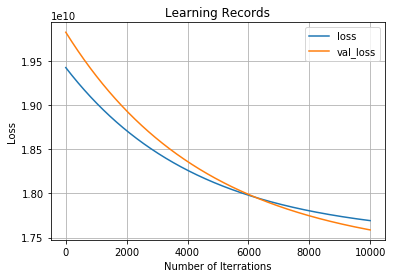

In [8]:
slr.plot_learning_record()

## [Task 3] Remove Terms of Biases

## [Task 4] Make Features Multi-dimentional

## [Task 5] Introduce an Equation for Updates

## [Task6] A Problem about Local Optimization

## [Task 7] What We Can Learn from Implementations from Scratch

    - We are not able to understand how algorithms of scikit-learn works without implementing those from scratch.
    
    - People who tried implementing scikit-learn from scratch are able to fulfill theirown responsibility for explaining why results they got are meaningful.
    
    - Also, We just can learn about high-quality programming. In this case, I definitely grasped structures of class.